In [2]:
from univariate_eda import univariate_eda_interact
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattboggess/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mattboggess/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Example 1: Tips

In [2]:
data_tips = sns.load_dataset('tips')
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
univariate_eda_interact(data_tips)

interactive(children=(Dropdown(description='column', options=('total_bill', 'tip', 'sex', 'smoker', 'day', 'ti…

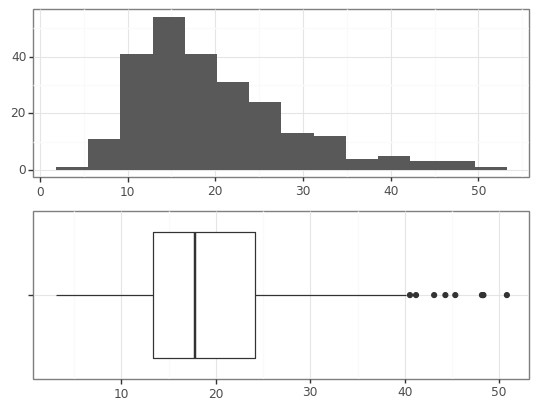

In [4]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from plotnine import *

# Create subplots using plotnine
p1 = (ggplot(data_tips, aes(x='total_bill'))+geom_histogram()) + theme_bw()
p2 = (ggplot(data_tips, aes(y='total_bill', x=['']))+geom_boxplot()) + coord_flip()

# Empty plotnine figure to place the subplots on. Needs junk data (for backend "copy" reasons).
fig = (ggplot()+geom_blank(data=data_tips)+theme_void()).draw()

# Create gridspec for adding subpanels to the blank figure
gs = gridspec.GridSpec(2,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Add subplots to the figure
_ = p1._draw_using_figure(fig, [ax1])
_ = p2._draw_using_figure(fig, [ax2])

fig.show()

# Example 2: Trump Tweets

Check out the content column for text example and date column for datetime example. Also mentions and hashtags for sequence examples.

https://www.kaggle.com/austinreese/trump-tweets

In [6]:
data_trump = pd.read_csv('data/raw/trump_tweets.csv')
data_trump = data_trump.astype({
    'date': 'datetime64[ns]',
    'content': 'string',
    'mentions': 'string',
    'hashtags': 'string'
});
#data_trump['mentions'] = data_trump['mentions'].apply(lambda x: x.split(',') if not pd.isnull(x) else x)
#data_trump['hashtags'] = data_trump['hashtags'].apply(lambda x: x.split(',') if not pd.isnull(x) else x)
data_trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,<NA>,<NA>
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,<NA>,<NA>
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,<NA>,<NA>
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,<NA>,<NA>
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,<NA>,<NA>


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_trump, title="Pandas Profiling Report")
profile.to_widgets()

In [3]:
univariate_eda_interact(data_trump)

interactive(children=(Dropdown(description='column', options=('id', 'link', 'content', 'date', 'retweets', 'fa…

# Example 3: GDPR Violations

In [4]:
data_gdpr = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv", 
                    sep='\t')
data_gdpr = data_gdpr.astype({
    'date': 'datetime64[ns]',
    'name': 'category',
    'summary': 'string',
    'controller': 'category',
    'article_violated': 'string',
    'source': 'category',
    'authority': 'category',
    'picture': 'category',
    'summary': 'string',
    'type': 'category'
});
data_gdpr['article_violated'] = data_gdpr['article_violated'].apply(lambda x: x.split('|'))
data_gdpr.head()

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,2019-10-18,Polish Mayor,[Art. 28 GDPR],Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,2019-10-17,UTTIS INDUSTRIES,"[Art. 12 GDPR, Art. 13 GDPR, Art. 5 (1) c) GDP...",Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),2019-10-16,Xfera Moviles S.A.,"[Art. 5 GDPR, Art. 6 GDPR]",Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),2019-10-16,Iberdrola Clientes,[Art. 31 GDPR],Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,2019-10-09,Raiffeisen Bank SA,[Art. 32 GDPR],Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...


In [5]:
univariate_eda_interact(data_gdpr)

interactive(children=(Dropdown(description='column', options=('id', 'picture', 'name', 'price', 'authority', '…